# [教學目標]
- 以下程式碼將示範如何繪製特定特徵與目標值之間的散佈圖, 更直覺地看出特徵與目標的關係  
- 繪製前需要觀察資料, 將異常值排除, 並且轉換成適合的數值單位輔助觀察  
- 好的圖可以讓你更快認識資料, 繪圖畫的好也是一種藝術

# [範例重點]
- 直接列出的觀察方式 (In[3], Out[3])
- 出現異常數值的資料調整方式 (In[4])
- 散佈圖異常與其調整方式 (Out[5], In[6], Out[6])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './Part01/'

In [2]:
# 讀取 csv 資料檔, 並觀察前幾筆資料 ( .head() )
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 觀察聘雇天數 'DAYS_EMPLOYED' 內的數值
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [4]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]

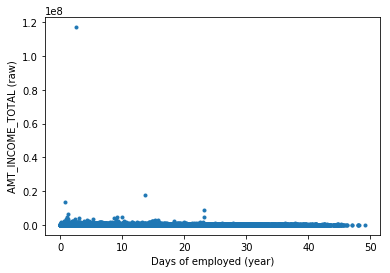

Correlation: 0.0130


In [5]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

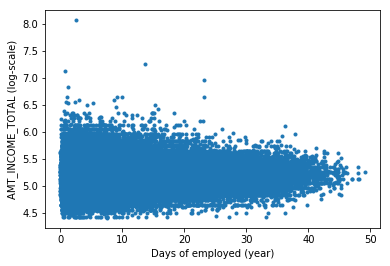

Correlation: 0.0380


In [6]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print("Correlation: %.4f" % (corr[0][1]))

# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [7]:
app_train.shape

(307511, 122)

In [8]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [10]:
# 觀察相關係數
target_corr = app_train.corr()['TARGET']
target_corr

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


# 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [12]:
# 相關係數 前 15 名
p15 = target_corr.sort_values(ascending = False)[:16]
p15

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64

In [13]:
app_train[p15[1:].index].describe()

,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_WORK_PHONE
count,252137.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,306490.000000,306490.000000,307511.000000
mean,-2384.169325,2.031521,2.052463,-962.858788,-2994.202373,0.230454,0.819889,0.078173,0.710023,-4986.120328,12.061091,0.179555,0.143421,0.100049,0.199368
std,2338.360162,0.502737,0.509034,826.808487,1509.450419,0.421124,0.384280,0.268444,0.453752,3522.886321,11.944812,0.383817,0.446698,0.362291,0.399526
min,-17912.000000,1.000000,1.000000,-4292.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,-24672.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3175.000000,2.000000,2.000000,-1570.000000,-4299.000000,0.000000,1.000000,0.000000,0.000000,-7479.500000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,-1648.000000,2.000000,2.000000,-757.000000,-3254.000000,0.000000,1.000000,0.000000,1.000000,-4504.000000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,-767.000000,2.000000,2.000000,-274.000000,-1720.000000,0.000000,1.000000,0.000000,1.000000,-2010.000000,15.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,91.000000,1.000000,34.000000,24.000000,1.000000


#### 正相關係數 前 15 名

1. DAYS_EMPLOYED:申請人在申請當時工作的受雇天數 How many days before the application the person started current employment
2. REGION_RATING_CLIENT_W_CITY:申請人居住城市評分 Our rating of the region where client lives with taking city into account (1,2,3)
3. REGION_RATING_CLIENT:申請人居住地區評分 Our rating of the region where client lives (1,2,3)
4. DAYS_LAST_PHONE_CHANGE:申請人在申請前多久換過電話號碼 How many days before application did client change phone
5. DAYS_ID_PUBLISH:申請人在申請前多久更改過身分文件 How many days before the application did client change the identity document with which he applied for the loan
6. REG_CITY_NOT_WORK_CITY:工作城市和永久地址之城市不同 Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
7. FLAG_EMP_PHONE:是否提供工作地點電話 Did client provide work phone (1=YES, 0=NO)
8. REG_CITY_NOT_LIVE_CITY:工作地址和永久地址不同 Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
9. FLAG_DOCUMENT_3:是否提供文件三 Did client provide document 3
10. DAYS_REGISTRATION:申請人在申請前多久改變過註冊資料 How many days before the application did client change his registration
11. OWN_CAR_AGE:車齡 Age of client's car
12. LIVE_CITY_NOT_WORK_CITY:聯絡地址和工作地址不同 Flag if client's contact address does not match work address (1=different, 0=same, at city level)
13. DEF_30_CNT_SOCIAL_CIRCLE:申請人社交周圍有多少人違約(30天)?? How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
14. DEF_60_CNT_SOCIAL_CIRCLE:申請人社交周圍有多少人違約(60天)?? How many observation of client's social surroundings defaulted on 60 (days past due) DPD
15. FLAG_WORK_PHONE:是否提供住家電話 Did client provide home phone (1=YES, 0=NO)

In [14]:
# 取以下五個欄位進一步了解
p15 = ['DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY']
p15ord = []
p15num = []
for col in p15:
    if len(list(app_train[col].unique())) <= 5:
        p15ord.append(col)
    else:
        p15num.append(col)

print(p15ord)
print(p15num)
app_train[p15].describe()

['REGION_RATING_CLIENT_W_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY']
['DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE']


,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY
count,252137.000000,307511.000000,307510.000000,307511.000000,307511.000000
mean,-2384.169325,2.031521,-962.858788,0.819889,0.078173
std,2338.360162,0.502737,826.808487,0.384280,0.268444
min,-17912.000000,1.000000,-4292.000000,0.000000,0.000000
25%,-3175.000000,2.000000,-1570.000000,1.000000,0.000000
50%,-1648.000000,2.000000,-757.000000,1.000000,0.000000
75%,-767.000000,2.000000,-274.000000,1.000000,0.000000
max,0.000000,3.000000,0.000000,1.000000,1.000000


In [15]:
# 相關係數 最後 15 名
n15 = target_corr.sort_values()[:15]
n15

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [16]:
app_train[n15.index].describe()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG
count,246546.000000,3.068510e+05,134133.000000,307511.000000,154491.000000,154491.000000,154491.000000,3.072330e+05,307511.000000,143620.000000,143620.000000,98869.000000,98869.000000,153161.000000
mean,0.510853,5.143927e-01,0.502130,16036.995067,0.226282,0.225897,0.222315,5.383962e+05,0.020868,0.078942,0.078078,0.231894,0.231625,0.107399
std,0.194844,1.910602e-01,0.211062,4363.988632,0.144641,0.145067,0.143709,3.694465e+05,0.013831,0.134576,0.134467,0.161380,0.161934,0.110565
min,0.000527,8.173617e-08,0.014568,7489.000000,0.000000,0.000000,0.000000,4.050000e+04,0.000290,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370650,3.924574e-01,0.334007,12413.000000,0.166700,0.166700,0.166700,2.385000e+05,0.010006,0.000000,0.000000,0.083300,0.083300,0.045300
50%,0.535276,5.659614e-01,0.505998,15750.000000,0.166700,0.166700,0.166700,4.500000e+05,0.018850,0.000000,0.000000,0.208300,0.208300,0.074500
75%,0.669057,6.636171e-01,0.675053,19682.000000,0.333300,0.333300,0.333300,6.795000e+05,0.028663,0.120000,0.120000,0.375000,0.375000,0.129900
max,0.896010,8.549997e-01,0.962693,25229.000000,1.000000,1.000000,1.000000,4.050000e+06,0.072508,1.000000,1.000000,1.000000,1.000000,1.000000


#### 負相關係數 前 15 名

1. EXT_SOURCE_3:外部資料分數 Normalized score from external data source
2. EXT_SOURCE_2:外部資料分數 Normalized score from external data source
3. EXT_SOURCE_1:外部資料分數 Normalized score from external data source
4. DAYS_BIRTH:年齡(天數) Client's age in days at the time of application
5. DAYS_EMPLOYED_ANOM:有無申請人受雇天數資料 How many days before the application the person started current employment
6. FLOORSMAX_AVG:居住地建築資訊 Normalized information about building where the client lives
7. FLOORSMAX_MEDI:居住地建築資訊 Normalized information about building where the client lives
8. FLOORSMAX_MODE:居住地建築資訊 Normalized information about building where the client lives
9. AMT_GOODS_PRICE:前一次申請物品價格 Goods price of good that client asked for (if applicable) on the previous application
10. REGION_POPULATION_RELATIVE:居住地點人口 Normalized population of region where client lives (higher number means the client lives in more populated region)
11. ELEVATORS_AVG:居住地建築資訊 Normalized information about building where the client lives
12. ELEVATORS_MEDI:居住地建築資訊 Normalized information about building where the client lives
13. FLOORSMIN_AVG:居住地建築資訊 Normalized information about building where the client lives
14. FLOORSMIN_MEDI:居住地建築資訊 Normalized information about building where the client lives
15. LIVINGAREA_AVG:居住地建築資訊 Normalized information about building where the client lives

In [17]:
# 取以下五個欄位進一步了解
n15 = ['EXT_SOURCE_3', 'DAYS_BIRTH', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE']
n15ord = []
n15num = []
for col in n15:
    if len(list(app_train[col].unique())) <= 5:
        n15ord.append(col)
    else:
        n15num.append(col)

print(n15ord)
print(n15num)

[]
['EXT_SOURCE_3', 'DAYS_BIRTH', 'FLOORSMAX_AVG', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE']


## Visualization
### 正相關欄位

In [18]:
# numeric x numeric
def plot_scatter(mydata, cols, col_y = 'TARGET', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis
        mydata.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha, figsize=(7,6))
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y) # Set text for y axis
        plt.show()
        print('correlation:' + str(target_corr[col].round(3)))

In [19]:
# cat x numeric
def plot_boxplot(mydata, cols, col_y = 'TARGET', showfliers = True):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        mydata.boxplot(column = col, by = col_y, showfliers = showfliers, ax = ax, figsize=(7,6))
        ax.set_title('Boxplot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y) # Set text for y axis
        plt.show()
        print('correlation:' + str(target_corr[col].round(3)))

In [20]:
# cat x cat
def plot_barchart(mydata, cols, col_y = 'TARGET'):
    mydata['dummy'] = np.ones(shape = mydata.shape[0])
    for col in cols:
        print(col, '; correlation:' + str(target_corr[col].round(3)))
        counts = mydata[['dummy', col_y, col]].groupby([col_y, col], as_index = False).count()
        temp = counts[counts[col_y] == 0][[col, 'dummy']]
        _ = plt.figure(figsize = (12,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts[col_y] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n Not ' + col_y)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts[col_y] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n ' + col_y)
        plt.ylabel('count')
        plt.show()

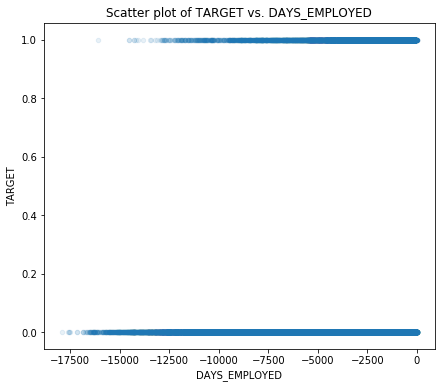

correlation:0.075


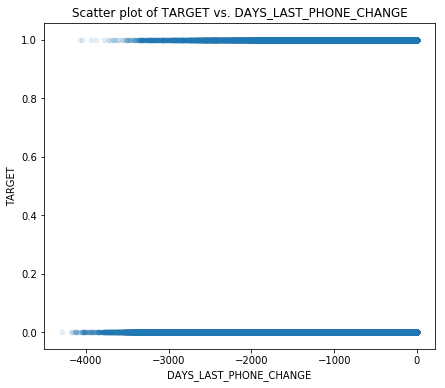

correlation:0.055


In [21]:
# scatter plot 不是很好了解
plot_scatter(app_train, p15num, alpha = 0.1)

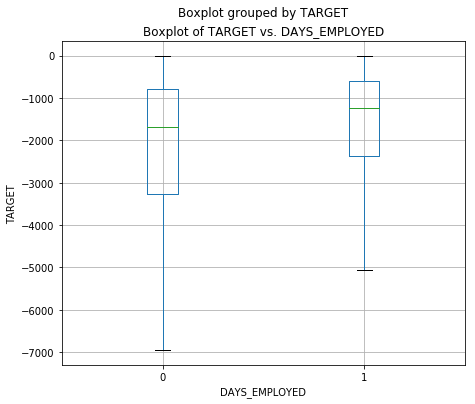

correlation:0.075


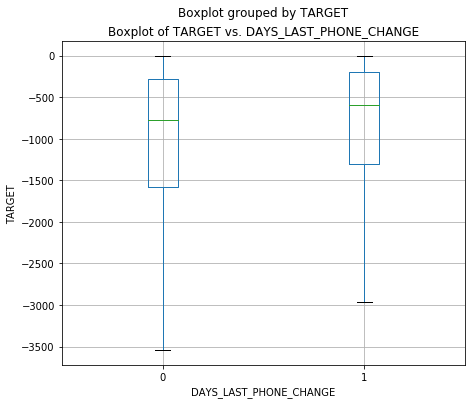

correlation:0.055


In [22]:
plot_boxplot(app_train, p15num, showfliers = False)

REGION_RATING_CLIENT_W_CITY ; correlation:0.061


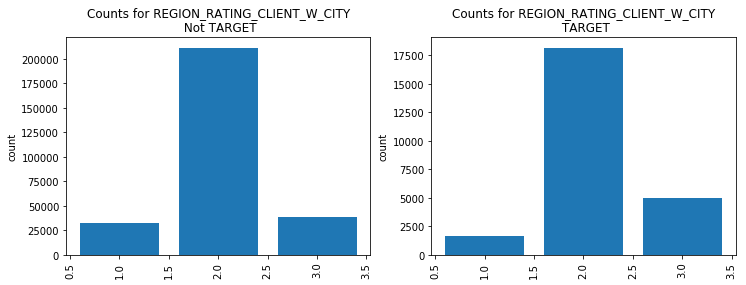

FLAG_EMP_PHONE ; correlation:0.046


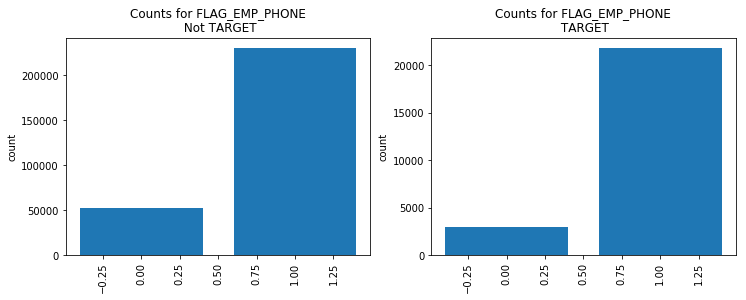

REG_CITY_NOT_LIVE_CITY ; correlation:0.044


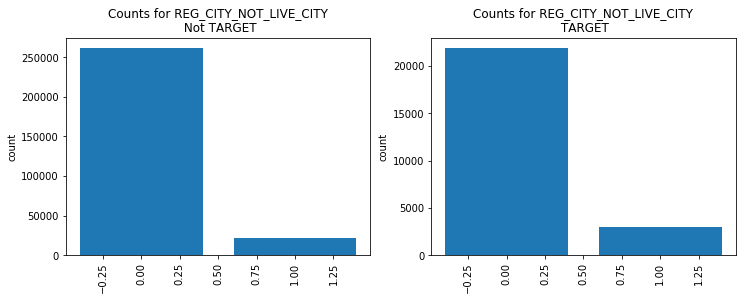

In [23]:
plot_barchart(app_train, p15ord)

In [27]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### 負相關欄位

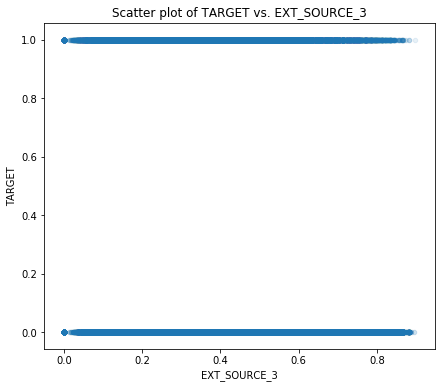

correlation:-0.179


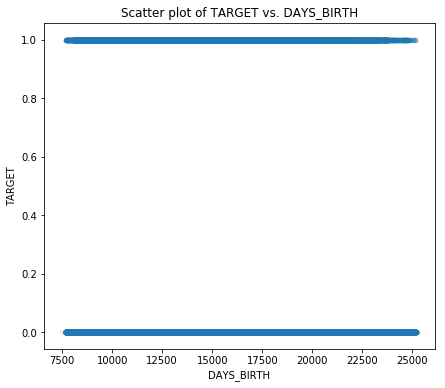

correlation:-0.078


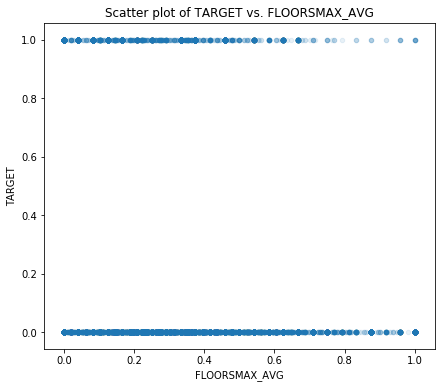

correlation:-0.044


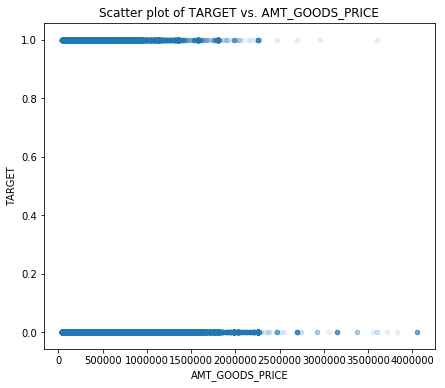

correlation:-0.04


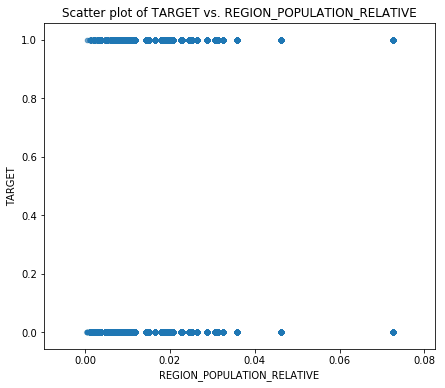

correlation:-0.037


In [24]:
# scatter plot 不是很好了解
plot_scatter(app_train, n15num, alpha = 0.1)

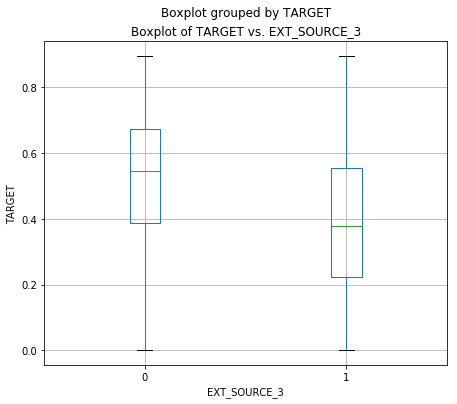

correlation:-0.179


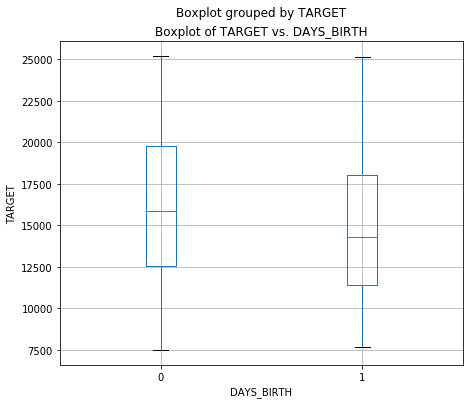

correlation:-0.078


In [25]:
plot_boxplot(app_train, n15num[:2], showfliers = False)

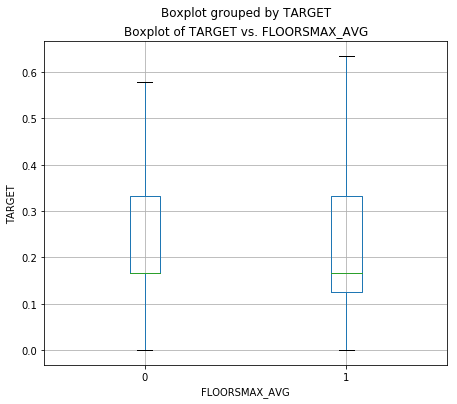

correlation:-0.044


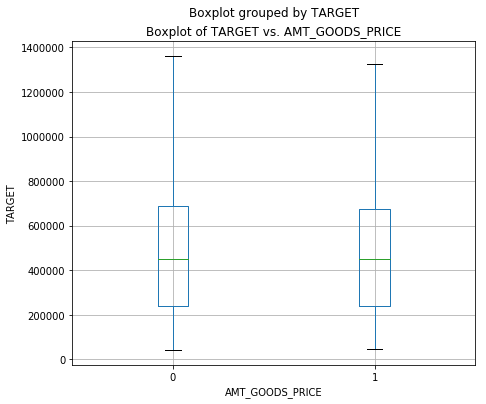

correlation:-0.04


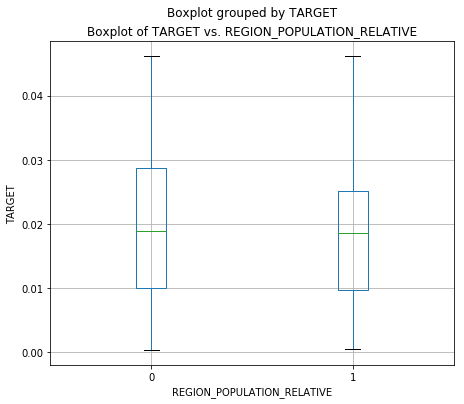

correlation:-0.037


In [26]:
plot_boxplot(app_train, n15num[2:], showfliers = False)